Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the training and test dataset

In [2]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

Checking the details of the datasets

In [3]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          15766 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

checking if there are nan values in the dataset and how many are they

In [5]:
training_set.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [6]:
test_set.isnull().sum()

EmployeeNo                               0
Division                                 0
Qualification                          730
Gender                                   0
Channel_of_Recruitment                   0
Trainings_Attended                       0
Year_of_birth                            0
Last_performance_score                   0
Year_of_recruitment                      0
Targets_met                              0
Previous_Award                           0
Training_score_average                   0
State_Of_Origin                          0
Foreign_schooled                         0
Marital_Status                           0
Past_Disciplinary_Action                 0
Previous_IntraDepartmental_Movement      0
No_of_previous_employers                 0
dtype: int64

There are 1670 and 730 nan values in train and test dataset respectively,which are all in Qualification column only

Filling the nan entities with the modal entry

In [7]:
training_set.Qualification.fillna(training_set['Qualification'].mode()[0],inplace=True)
test_set['Qualification'].fillna(test_set['Qualification'].mode()[0],inplace=True)

In [8]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          38312 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          16496 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

Visualization aspect

Checking how the target feature is distributed,whether it is equally distributed or non equally distributed 

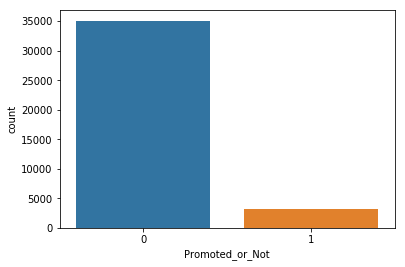

In [10]:
sns.countplot(x='Promoted_or_Not',data=training_set)
#the data is imbalance dataset

Want to check the number:
Promoted ones ,
Not promoted ones and
Their Percentages respectively

In [11]:
Total_number_of_Staff = len(training_set['Promoted_or_Not'])
Promoted_Staff = len(training_set[training_set['Promoted_or_Not']==1])
Not_Promoted =  len(training_set[training_set['Promoted_or_Not']==0])
Precentage_promoted_staff = Promoted_Staff/Total_number_of_Staff
Precentage_not_promoted_staff = Not_Promoted/Total_number_of_Staff
print('The Total number of Staff is:',Total_number_of_Staff)
print('The number of promoted staff is:',Promoted_Staff)
print('Precentage of promoted staff:',Precentage_promoted_staff*100)
print('The number of not promoted staff is:',Not_Promoted)
print('Precentage of not promoted staff:',Precentage_not_promoted_staff*100)

The Total number of Staff is: 38312
The number of promoted staff is: 3241
Precentage of promoted staff: 8.459490499060347
The number of not promoted staff is: 35071
Precentage of not promoted staff: 91.54050950093965


want to chack for outliners using the scatter plot

In [12]:
#sns.pairplot(training_set)
#the data doesnt contain outliners which could hinder the model performance

Checking the correlations between the features using heatmap

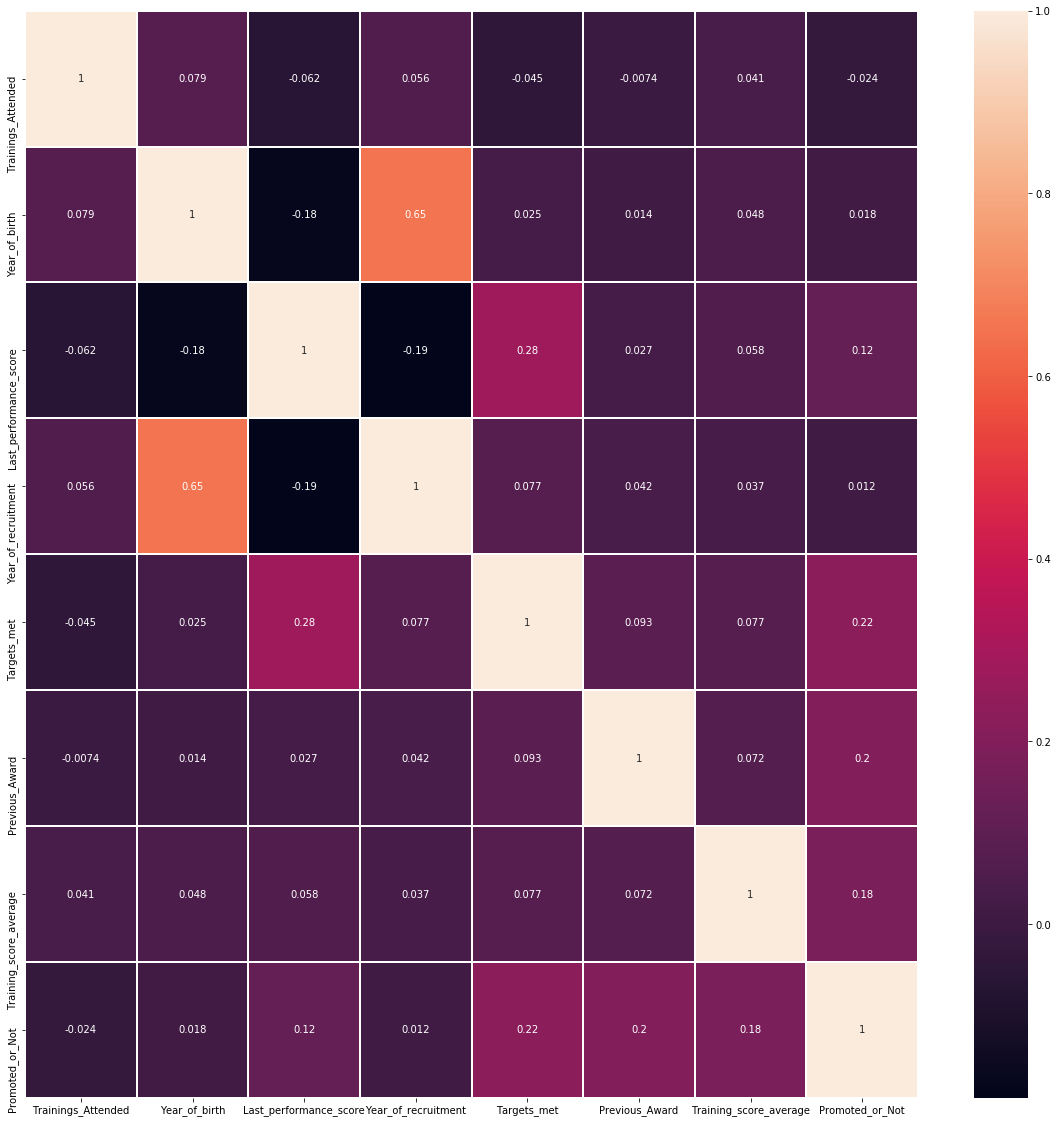

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(training_set.corr(),annot=True,linecolor='w',linewidths=1)

 
#let check the impact of all the categorical column on the Promoted_or_Not column in the train dataset
#we will calculate the mean of promoted staff in each categorical column

Total female 11432
Total male 26880


,Gender,Promoted_or_Not
0,Female,0.089048
1,Male,0.082701


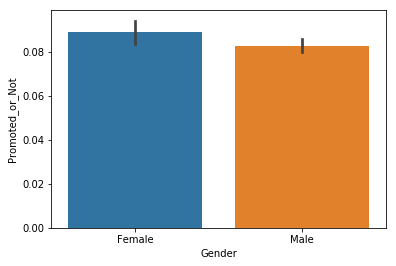

In [14]:
sns.barplot(x='Gender',y='Promoted_or_Not',data=training_set)
female=training_set['Gender'].apply(lambda x:x.count('Female')).sum()
print('Total female',female)
print('Total male',38312-female)
training_set[['Gender','Promoted_or_Not']].groupby(['Gender'],as_index=False).mean()
#note the total number of male is greater than female but number of females promoted are more than that of males

,Qualification,Promoted_or_Not
0,First Degree or HND,0.079869
1,"MSc, MBA and PhD",0.096666
2,Non-University Education,0.088737


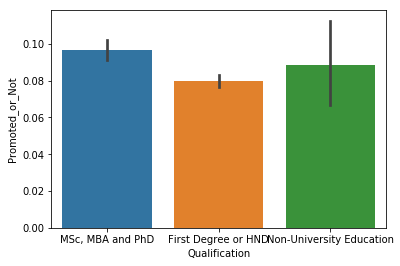

In [15]:
sns.barplot(x='Qualification',y='Promoted_or_Not',data=training_set)
training_set[['Qualification','Promoted_or_Not']].groupby(['Qualification'],as_index=False).mean()

,State_Of_Origin,Promoted_or_Not
0,ABIA,0.068421
1,ADAMAWA,0.077686
2,AKWA IBOM,0.084695
3,ANAMBRA,0.095906
4,BAUCHI,0.080790


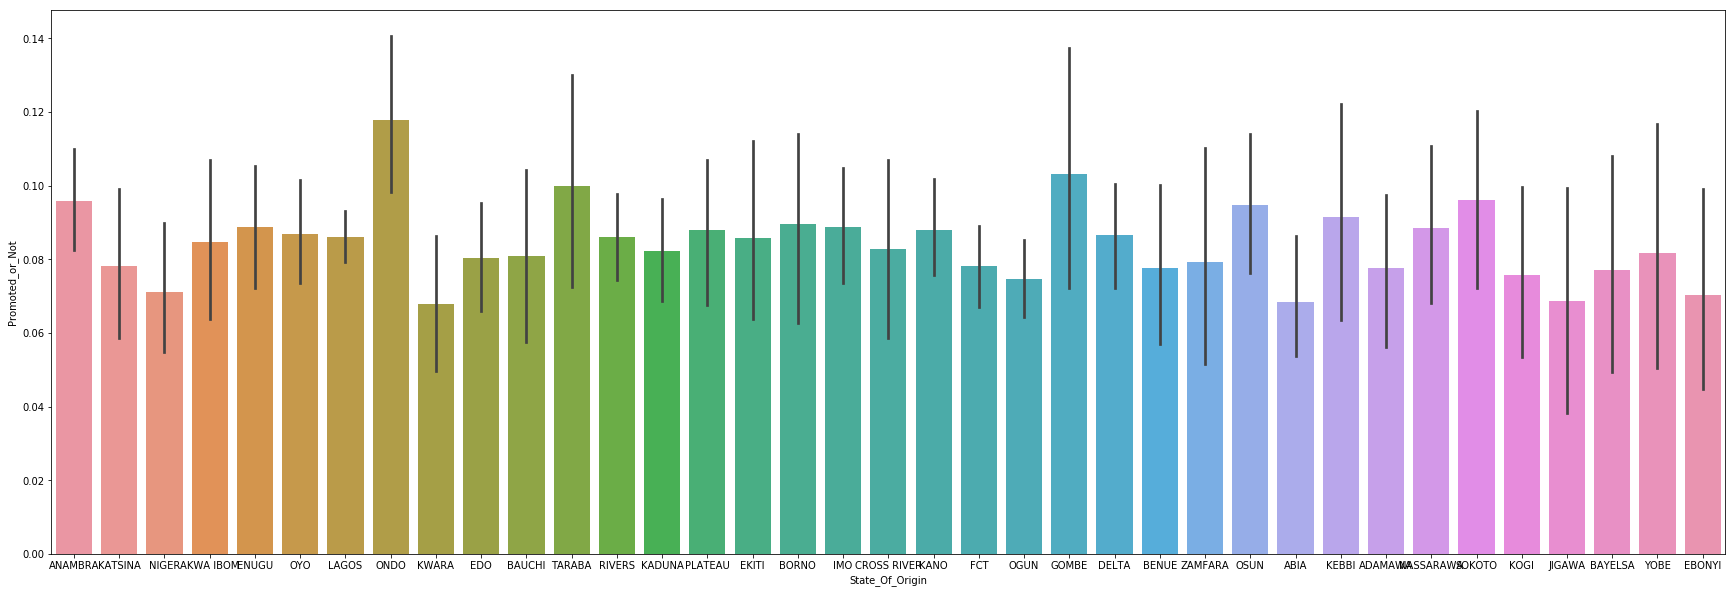

In [16]:
plt.figure(figsize=(30,10))
sns.barplot(x='State_Of_Origin',y='Promoted_or_Not',data=training_set)
training_set[['State_Of_Origin','Promoted_or_Not']].groupby(['State_Of_Origin'],as_index=False).mean().head()

,Division,Promoted_or_Not
0,Business Finance Operations,0.081747
1,Commercial Sales and Marketing,0.071911
2,Customer Support and Field Operations,0.088298
3,Information Technology and Solution Support,0.107431
4,Information and Strategy,0.093523
5,People/HR Management,0.056925
6,Regulatory and Legal services,0.055935
7,Research and Innovation,0.061782
8,Sourcing and Purchasing,0.096793


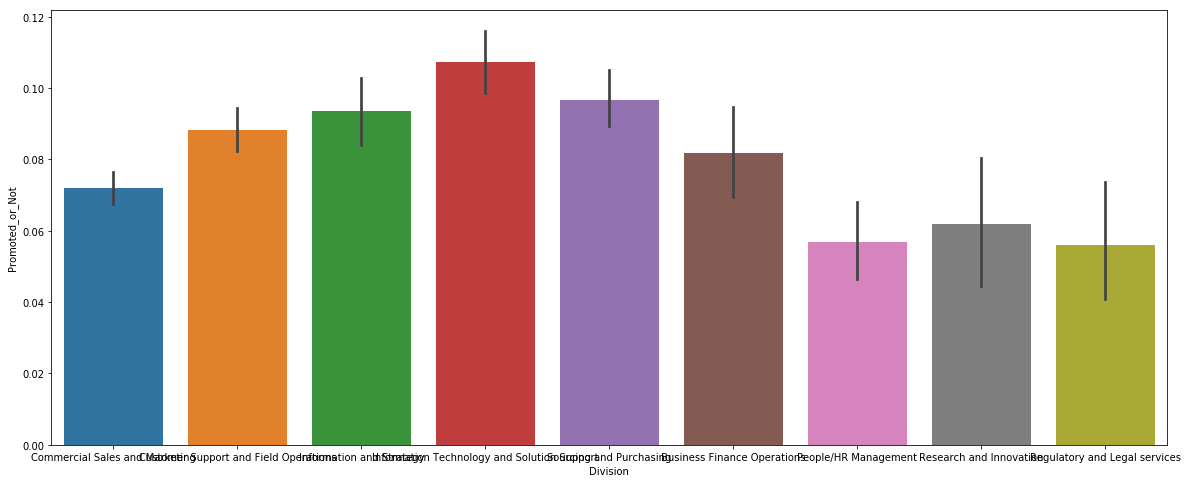

In [17]:
plt.figure(figsize=(20,8))
sns.barplot(x='Division',y='Promoted_or_Not',data=training_set)
training_set[['Division','Promoted_or_Not']].groupby(['Division'],as_index=False).mean()

,Marital_Status,Promoted_or_Not
0,Married,0.084972
1,Not_Sure,0.107438
2,Single,0.081709


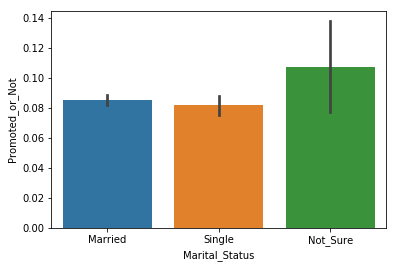

In [18]:
sns.barplot(x='Marital_Status',y='Promoted_or_Not',data=training_set)
training_set[['Marital_Status','Promoted_or_Not']].groupby(['Marital_Status'],as_index=False).mean()

,Foreign_schooled,Promoted_or_Not
0,No,0.081700
1,Yes,0.084869


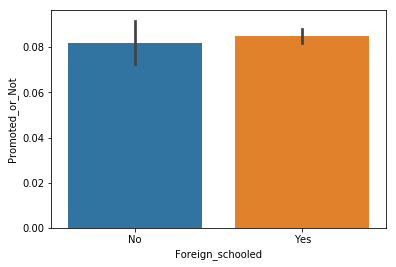

In [19]:
sns.barplot(x='Foreign_schooled',y='Promoted_or_Not',data=training_set)
training_set[['Foreign_schooled','Promoted_or_Not']].groupby(['Foreign_schooled'],as_index=False).mean()

,Previous_IntraDepartmental_Movement,Promoted_or_Not
0,No,0.085338
1,Yes,0.077435


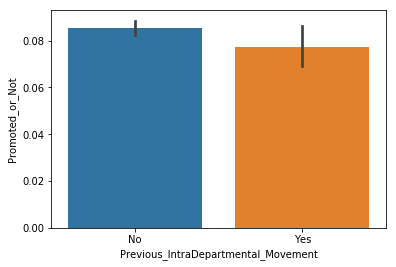

In [20]:
sns.barplot(x='Previous_IntraDepartmental_Movement',y='Promoted_or_Not',data=training_set)
training_set[['Previous_IntraDepartmental_Movement','Promoted_or_Not']].groupby(['Previous_IntraDepartmental_Movement'],as_index=False).mean()

Feature Engineering and Features Selection

In [21]:
#want to create Age column using the year of birth of each staff
full_data = [training_set,test_set]
for dataset in full_data:
    dataset['Age'] = 2019-dataset['Year_of_birth']
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 20 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          38312 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [22]:
#want to create year in service column from year of recruitment column
for dataset in full_data:
    dataset['Year_in_Service'] = 2019 - dataset['Year_of_recruitment']

In [23]:
#want to geopolitical zone column by allocating each state in state_of_origin column to their respective geopolitical zone in Nigeria
for dataset in full_data:
    dataset.loc[(dataset['State_Of_Origin']=='OYO'),'Geopolitical_zone']='South_West'
    dataset.loc[(dataset['State_Of_Origin']=='OSUN'),'Geopolitical_zone']='South_West'
    dataset.loc[(dataset['State_Of_Origin']=='LAGOS'),'Geopolitical_zone']='South_West'
    dataset.loc[(dataset['State_Of_Origin']=='EKITI'),'Geopolitical_zone']='South_West'
    dataset.loc[(dataset['State_Of_Origin']=='OGUN'),'Geopolitical_zone']='South_West'
    dataset.loc[(dataset['State_Of_Origin']=='ONDO'),'Geopolitical_zone']='South_West'
    dataset.loc[(dataset['State_Of_Origin']=='ANAMBRA'),'Geopolitical_zone']='South_East'
    dataset.loc[(dataset['State_Of_Origin']=='ENUGU'),'Geopolitical_zone']='South_East'
    dataset.loc[(dataset['State_Of_Origin']=='EBONYI'),'Geopolitical_zone']='South_East'
    dataset.loc[(dataset['State_Of_Origin']=='ABIA'),'Geopolitical_zone']='South_East'
    dataset.loc[(dataset['State_Of_Origin']=='IMO'),'Geopolitical_zone']='South_East'
    dataset.loc[(dataset['State_Of_Origin']=='AKWA IBOM'),'Geopolitical_zone']='South_South'
    dataset.loc[(dataset['State_Of_Origin']=='EDO'),'Geopolitical_zone']='South_South'
    dataset.loc[(dataset['State_Of_Origin']=='RIVERS'),'Geopolitical_zone']='South_South'
    dataset.loc[(dataset['State_Of_Origin']=='CROSS RIVER'),'Geopolitical_zone']='South_South'
    dataset.loc[(dataset['State_Of_Origin']=='DELTA'),'Geopolitical_zone']='South_South'
    dataset.loc[(dataset['State_Of_Origin']=='BAYELSA'),'Geopolitical_zone']='South_South'
    dataset.loc[(dataset['State_Of_Origin']=='KATSINA'),'Geopolitical_zone']='North_West'
    dataset.loc[(dataset['State_Of_Origin']=='JIGAWA'),'Geopolitical_zone']='North_West'    
    dataset.loc[(dataset['State_Of_Origin']=='KADUNA'),'Geopolitical_zone']='North_West'
    dataset.loc[(dataset['State_Of_Origin']=='KEBBI'),'Geopolitical_zone']='North_West'    
    dataset.loc[(dataset['State_Of_Origin']=='SOKOTO'),'Geopolitical_zone']='North_West'
    dataset.loc[(dataset['State_Of_Origin']=='ZAMFARA'),'Geopolitical_zone']='North_West'    
    dataset.loc[(dataset['State_Of_Origin']=='KANO'),'Geopolitical_zone']='North_West'
    dataset.loc[(dataset['State_Of_Origin']=='BAUCHI'),'Geopolitical_zone']='North_East'  
    dataset.loc[(dataset['State_Of_Origin']=='TARABA'),'Geopolitical_zone']='North_East'
    dataset.loc[(dataset['State_Of_Origin']=='ADAMAWA'),'Geopolitical_zone']='North_East'  
    dataset.loc[(dataset['State_Of_Origin']=='BORNO'),'Geopolitical_zone']='North_East'
    dataset.loc[(dataset['State_Of_Origin']=='GOMBE'),'Geopolitical_zone']='North_East'  
    dataset.loc[(dataset['State_Of_Origin']=='YOBE'),'Geopolitical_zone']='North_East'
    dataset.loc[(dataset['State_Of_Origin']=='KWARA'),'Geopolitical_zone']='North_Central'  
    dataset.loc[(dataset['State_Of_Origin']=='NIGER'),'Geopolitical_zone']='North_Central'
    dataset.loc[(dataset['State_Of_Origin']=='FCT'),'Geopolitical_zone']='North_Central'  
    dataset.loc[(dataset['State_Of_Origin']=='NASSARAWA'),'Geopolitical_zone']='North_Central'   
    dataset.loc[(dataset['State_Of_Origin']=='PLATEAU'),'Geopolitical_zone']='North_Central'  
    dataset.loc[(dataset['State_Of_Origin']=='BENUE'),'Geopolitical_zone']='North_Central'
    dataset.loc[(dataset['State_Of_Origin']=='KOGI'),'Geopolitical_zone']='North_Central'    

In [24]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 22 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          38312 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [25]:
categorical_columns=['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment', 
                     'State_Of_Origin','Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
                    'Previous_IntraDepartmental_Movement','Geopolitical_zone']
for column in categorical_columns:
    print(column)
    print(training_set[column].value_counts())
    print( )

Division
Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: Division, dtype: int64

Qualification
First Degree or HND         27257
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

Gender
Male      26880
Female    11432
Name: Gender, dtype: int64

Channel_of_Recruitment
Agency and others                  21310
Direct Internal process            16194
Referral and Special candidates      808
Name: Channel_of_Recruitment, dtype: int64

State_Of_Origin
LAGOS          6204
FCT            2389
OGUN           2302


In [26]:
#ordinal encoding for qualification column
for dataset in full_data:
    dataset.loc[dataset['Qualification']=='Non-University Education','Qualification']=0
    dataset.loc[dataset['Qualification']=='First Degree or HND','Qualification']=1
    dataset.loc[dataset['Qualification']=='MSc, MBA and PhD','Qualification']=2

In [27]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 21 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          16496 non-null int64
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         1649

In [28]:
#encoding the catergorical variables using dummy variables
train_data=pd.get_dummies(training_set,columns=['Gender','Division','Channel_of_Recruitment','Marital_Status',
                                         'State_Of_Origin','Past_Disciplinary_Action','Geopolitical_zone','Foreign_schooled'
                                       ],prefix=['enc_sex','enc_div','enc_cha','enc_state','enc_sta',
                                            'enc_past','enc_geo','enc_sch'],drop_first=True)
test_data=pd.get_dummies(test_set,columns=['Gender','Division','Channel_of_Recruitment','Marital_Status'
                                         ,'State_Of_Origin','Past_Disciplinary_Action',
                                       'Geopolitical_zone','Foreign_schooled'
                                        ],
                                    prefix=['enc_sex','enc_div','enc_cha','enc_state','enc_sta',
                                            'enc_past','enc_geo','enc_sch'],drop_first=True)
train_data.drop(['EmployeeNo'],axis=1,inplace=True)

In [29]:
#allocating the features to dependent and independent variable,i dropped 'Previous_IntraDepartmental_Movement','No_of_previous_employers'
#because i did feature selection using boruta library and the two were the that useful for the prediction
x = train_data.drop(['Promoted_or_Not','Previous_IntraDepartmental_Movement','No_of_previous_employers'],axis=1)
y = train_data['Promoted_or_Not']

In [30]:
#want resample using imblearn because of the imbalance,i used Smote Tomek method
from imblearn.combine import SMOTETomek
from collections import Counter

Using TensorFlow backend.


In [31]:
smk= SMOTETomek(random_state=100)
x_res,y_res = smk.fit_sample(x,y)

In [32]:
#importing the prediction model and i convert the resampled data to dataframe format
import lightgbm
from lightgbm import LGBMClassifier


In [33]:
model = LGBMClassifier ()
x_res=pd.DataFrame(x_res)
y_res=pd.DataFrame(y_res)

In [34]:
#used kfold cross validation splitting into 10 sets
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
scores = []
for i in range(10):
    result = next(kf.split(train_data), None)
    x_train = x_res.iloc[result[0]]
    x_test = x_res.iloc[result[1]]
    
    y_train = y_res.iloc[result[0]]
    y_test = y_res.iloc[result[1]]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.9410229645093946, 0.9438935281837161, 0.944937369519833, 0.944937369519833, 0.94258872651357, 0.9431106471816284, 0.944937369519833, 0.9420668058455115, 0.9433716075156576, 0.9423277661795407]
Average K-Fold Score : 0.9433194154488517


In [35]:
from sklearn.metrics import classification_report,f1_score,roc_auc_score
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3498
           1       0.94      0.36      0.52       334

    accuracy                           0.94      3832
   macro avg       0.94      0.68      0.74      3832
weighted avg       0.94      0.94      0.93      3832

0.5206073752711496
0.6786401468075854


In [36]:
#using the model on the test set provided
submission= pd.DataFrame()
submission['EmployeeNo'] = test_data.EmployeeNo
test_dat = test_data.drop(['EmployeeNo','Previous_IntraDepartmental_Movement','No_of_previous_employers'],axis=1)
prediction = model.predict(test_dat)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
submission['Promoted_or_Not']=prediction
submission.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [38]:
submission.to_csv('final.csv', index=False)